In [3]:
## Importing Libraries
import matplotlib.pyplot as plt # for images and metrics visualization
import numpy as np # to manipulation nd arrays 
import tensorflow as tf # for tensors manipulation and deep learning models developing
import pathlib # for paths manipulation

from tensorflow import keras # keras is a high level api to develop DL architectures
from tensorflow.keras import layers # the modules to create different model layers
from tensorflow.keras.models import Sequential # to instansiate the model architecture

In [4]:
import cv2
import pathlib

# Store directories paths
train_dir = pathlib.Path(r"C:\Users\omri\Desktop\project\facesData\train")
test_dir = pathlib.Path(r"C:\Users\omri\Desktop\project\facesData\test")

# Loop through images in train directory and display them
for image_path in train_dir.glob('*/*.png'):
    image = cv2.imread(str(image_path))  # Read the image using OpenCV
    cv2.imshow('Image', image)           # Display the image
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
# initiate our hyperparameters
batch_size = 32
img_height = 48
img_width = 48

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,validation_split=0.2,subset="training",seed=123,
                                                       image_size=(img_height, img_width),batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(train_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 9795 files belonging to 2 classes.
Using 7836 files for training.
Found 9795 files belonging to 2 classes.
Using 1959 files for validation.
Found 2479 files belonging to 2 classes.


In [7]:
# Extract classes 
class_names = train_ds.class_names
print(class_names)

['nostress', 'stress']


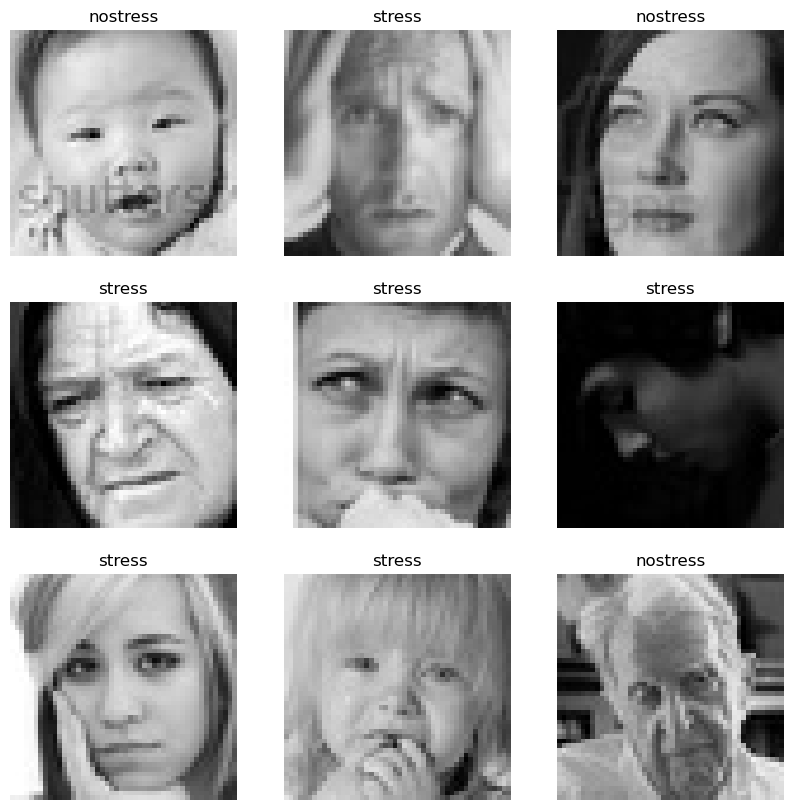

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
### Build CNN model

In [18]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

In [21]:
## Train the model

In [22]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
245/245 [==============================] - 40s 93ms/step - loss: 0.6837 - accuracy: 0.5578 - val_loss: 0.6587 - val_accuracy: 0.6126
Epoch 2/10
245/245 [==============================] - 19s 77ms/step - loss: 0.6435 - accuracy: 0.6420 - val_loss: 0.6366 - val_accuracy: 0.6391
Epoch 3/10
245/245 [==============================] - 18s 74ms/step - loss: 0.6181 - accuracy: 0.6622 - val_loss: 0.6205 - val_accuracy: 0.6534
Epoch 4/10
245/245 [==============================] - 18s 71ms/step - loss: 0.6030 - accuracy: 0.6816 - val_loss: 0.6119 - val_accuracy: 0.6845
Epoch 5/10
245/245 [==============================] - 17s 70ms/step - loss: 0.5815 - accuracy: 0.6960 - val_loss: 0.6008 - val_accuracy: 0.6743
Epoch 6/10
245/245 [==============================] - 17s 68ms/step - loss: 0.5604 - accuracy: 0.7161 - val_loss: 0.6012 - val_accuracy: 0.6850
Epoch 7/10
245/245 [==============================] - 17s 69ms/step - loss: 0.5323 - accuracy: 0.7360 - val_loss: 0.5980 - val_accuracy:

In [23]:
## Evaluate the model

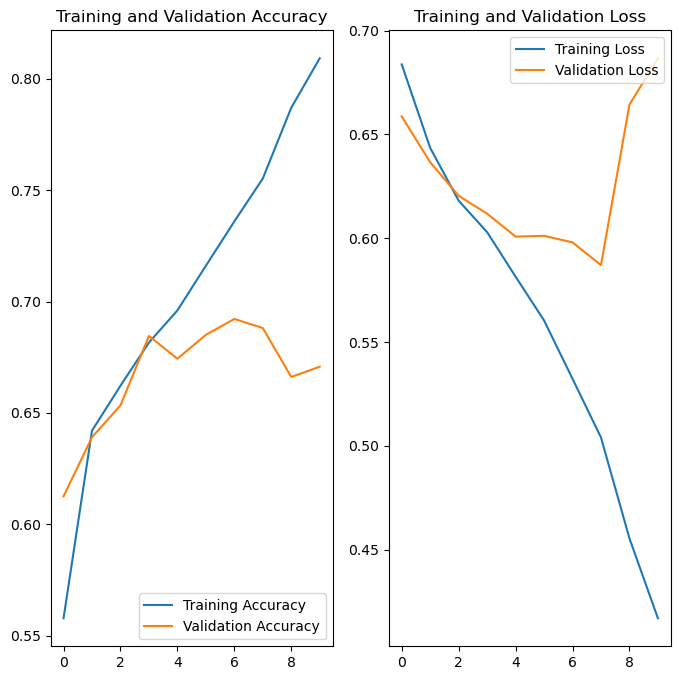

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
### Data augmentation

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

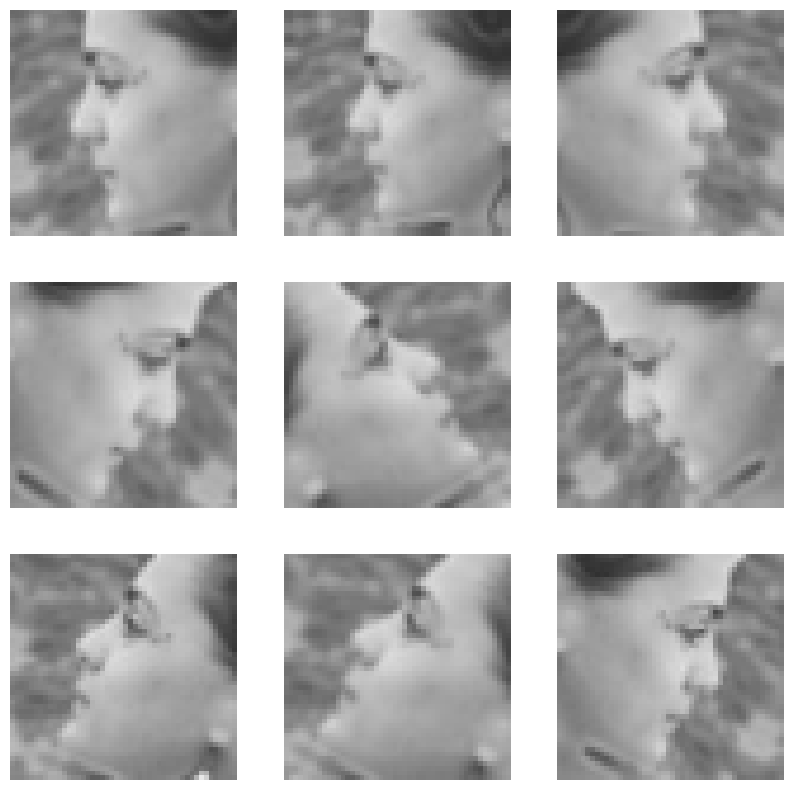

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [28]:
### Rebuild the model with data augmentation layer

In [29]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 48, 48, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                 

In [32]:
earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                         patience=5,
                                                         verbose= 1 ,
                                                         restore_best_weights=True
                                                        )

epochs = 10
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs, callbacks= [earlyStoppingCallback])


Epoch 1/10
245/245 [==============================] - 24s 84ms/step - loss: 0.6903 - accuracy: 0.5311 - val_loss: 0.6929 - val_accuracy: 0.5304
Epoch 2/10
245/245 [==============================] - 23s 92ms/step - loss: 0.6761 - accuracy: 0.5810 - val_loss: 0.6695 - val_accuracy: 0.5983
Epoch 3/10
245/245 [==============================] - 21s 87ms/step - loss: 0.6723 - accuracy: 0.5830 - val_loss: 0.6682 - val_accuracy: 0.5926
Epoch 4/10
245/245 [==============================] - 21s 87ms/step - loss: 0.6614 - accuracy: 0.6022 - val_loss: 0.6542 - val_accuracy: 0.6136
Epoch 5/10
245/245 [==============================] - 20s 82ms/step - loss: 0.6584 - accuracy: 0.6114 - val_loss: 0.6398 - val_accuracy: 0.6442
Epoch 6/10
245/245 [==============================] - 21s 86ms/step - loss: 0.6502 - accuracy: 0.6223 - val_loss: 0.6316 - val_accuracy: 0.6391
Epoch 7/10
245/245 [==============================] - 22s 88ms/step - loss: 0.6475 - accuracy: 0.6269 - val_loss: 0.6313 - val_accuracy:

In [33]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_ds)

# Print the loss and accuracy
print("Loss: ", loss)
print("Accuracy: ", accuracy)

78/78 [==============================] - 6s 72ms/step - loss: 0.6260 - accuracy: 0.6519
Loss:  0.6259738206863403
Accuracy:  0.6518757343292236


In [34]:
im_path =r"C:\Users\omri\Desktop\project\facesData\train\stress\Training_510353.jpg"
img = tf.keras.utils.load_img(
    im_path, target_size=(img_height, img_width)
)
print(img.size)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

(48, 48)
(1, 48, 48, 3)
1/1 [==============================] - 0s 322ms/step
This image most likely belongs to nostress with a 75.78 percent confidence.


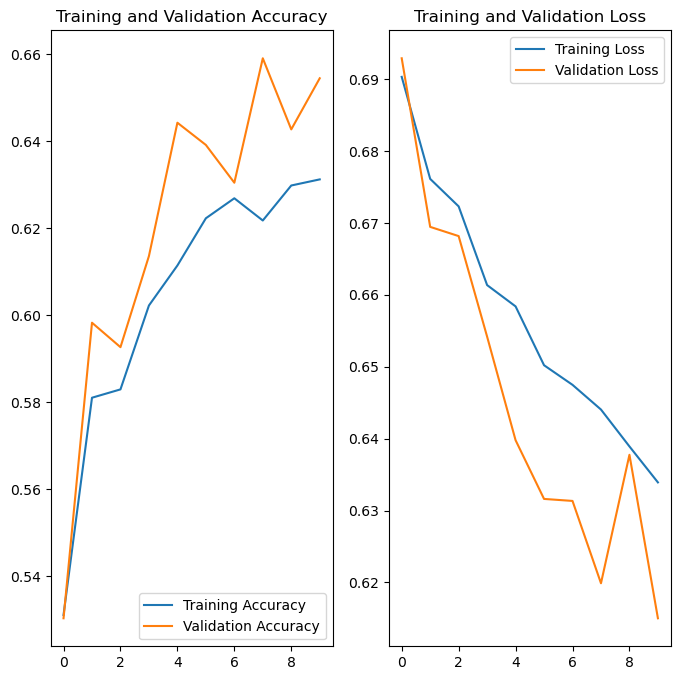

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
model.save("stressDetecttor_2")

INFO:tensorflow:Assets written to: stressDetecttor_2\assets


INFO:tensorflow:Assets written to: stressDetecttor_2\assets


In [43]:
recons_model = tf.keras.models.load_model("stressDetecttor_2")

In [44]:
pr = recons_model.predict(img_array)
sc=tf.nn.softmax(pr[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(sc)], 100 * np.max(sc))
)

1/1 [==============================] - 0s 221ms/step
This image most likely belongs to stress with a 63.85 percent confidence.


In [45]:

im_path =r"C:\Users\omri\Desktop\images.jpg"
img = tf.keras.utils.load_img(
    im_path, target_size=(img_height, img_width)
)
print(img.size)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

(48, 48)
(1, 48, 48, 3)
1/1 [==============================] - 0s 54ms/step
This image most likely belongs to stress with a 63.85 percent confidence.
